### Objective:
- visualize the `netCDF` files using BASEMAP library

In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
from IPython.display import display, Image

## visualization libraries
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib import patches as mpatches

In [2]:
import gc

### Overview

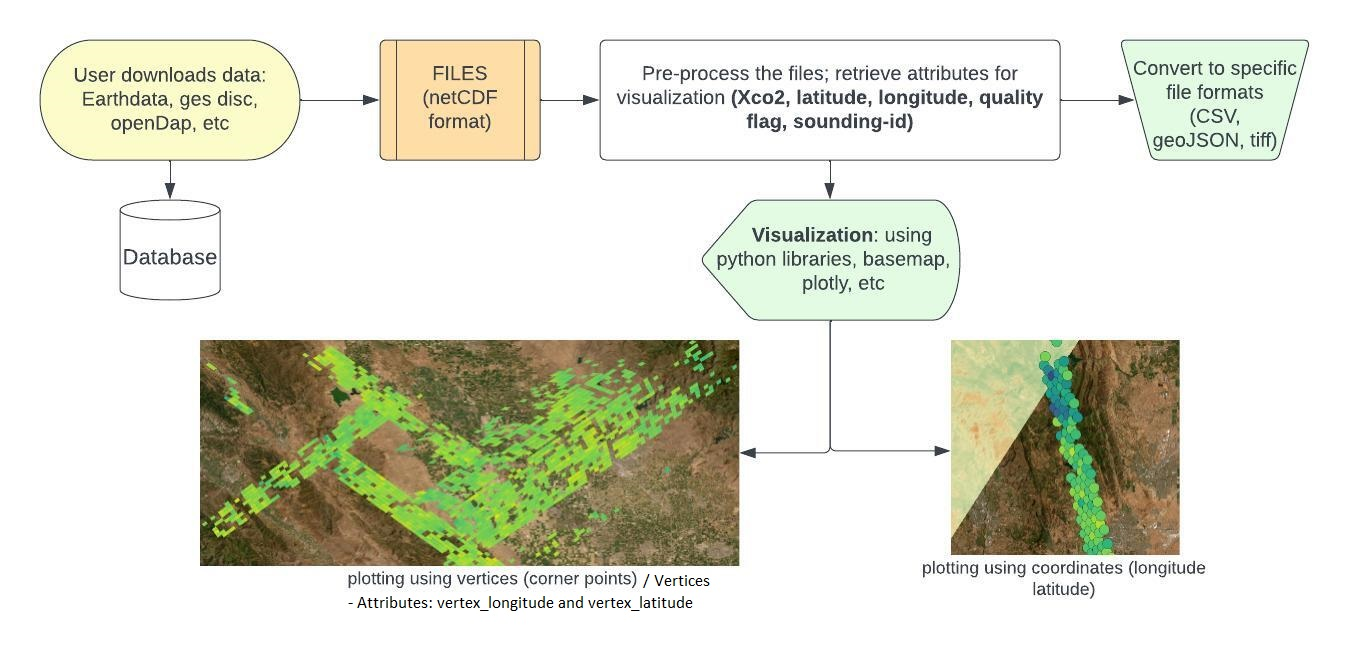

In [14]:
Image(filename="../../screenshots/visualize_xco2.jpeg")

### Variables of the file

In [4]:
#df_oco2= nc.Dataset('oco2_LtCO2_210407_B11014Ar_220729001332s.nc4')

df_oco2= nc.Dataset('oco3_LtCO2_200308_B10400Br_220318000136s.nc4')
df_oco2.variables.keys()

dict_keys(['sounding_id', 'levels', 'bands', 'vertices', 'date', 'latitude', 'longitude', 'time', 'solar_zenith_angle', 'sensor_zenith_angle', 'xco2_quality_flag', 'xco2_qf_bitflag', 'xco2_qf_simple_bitflag', 'source_files', 'file_index', 'vertex_latitude', 'vertex_longitude', 'xco2', 'xco2_uncertainty', 'xco2_apriori', 'pressure_levels', 'co2_profile_apriori', 'xco2_averaging_kernel', 'pressure_weight'])

### NOTE:
- to visualize the plots we will retrieve few features from the dataset
- Using corner points to visualize the XCO2 points

## Location of file;
- file has been initailly downloaded for this example from `Earthdata` website

In [5]:
# file= "oco2_LtCO2_210407_B11014Ar_220729001332s.nc4"
file= "oco3_LtCO2_200308_B10400Br_220318000136s.nc4"

In [6]:
%%time
"""
- Store the variables retrieved from the netCDF files to a list
- We use netCDF library to read the `OCO` netCDF file L2
- Further, we use the values retrieved from the netCDF files to plot in the map

"""
longitude_vertices= []
latitude_vertices= []
xco2= []
quality_flag= []
latitude=[]
longitude=[]

## READ the netCDF file and save the values in list
var_= nc.Dataset(file)
longitude_vertices.append(np.array(var_.variables['vertex_longitude'][:]).tolist())
latitude_vertices.append(np.array(var_.variables['vertex_latitude'][:]).tolist())
xco2.append(np.array(var_.variables['xco2'][:]).tolist())
quality_flag.append(np.array(var_.variables['xco2_quality_flag'][:]).tolist())
# lat and long without vert
latitude.append(np.array(var_.variables['latitude'][:].tolist()))
longitude.append(np.array(var_.variables['longitude'][:].tolist()))

## We need to unpack the values from the list
## so we can use the values to se for visuzliation
long_list_vertices= [element for sublist in longitude_vertices for element in sublist]
lat_list_vertices= [element for sublist in latitude_vertices for element in sublist]
xco2_list= [element for sublist in xco2 for element in sublist]
lon_list= [element for sublist in longitude for element in sublist]
lat_list= [element for sublist in latitude for element in sublist]
qual_flag_list= [ element for sublist in quality_flag for element in sublist]

## del the previous list
## cleaining memory
del longitude_vertices,
del latitude_vertices
del xco2
del longitude
del latitude
del quality_flag
gc.collect()

Wall time: 263 ms


0

### Dstack the vertex longitude and vertex latitude
- Combining these two vertices covers the spatial region/space of the xco2

In [7]:
flat_vert=[]
total_rows= len(long_list_vertices)

for j in range(0, total_rows):
    flat_vert.append( (np.dstack([long_list_vertices[j], lat_list_vertices[j] ])))

## Unpack the values from the inside LIST 
unpack_vert= [element for sublist in flat_vert for element in sublist]

In [8]:
unpack_vert[0]

array([[102.77978516,  33.12414169],
       [102.79733276,  33.10962296],
       [102.80993652,  33.11944199],
       [102.79238892,  33.13395309]])

### Attributes: Using Vertex longitude and Vertex latitude
- From above `vertices` -> unpack_vert, we can plot as `polygon` shape
- Below an example to show the vertex displaying the xco2

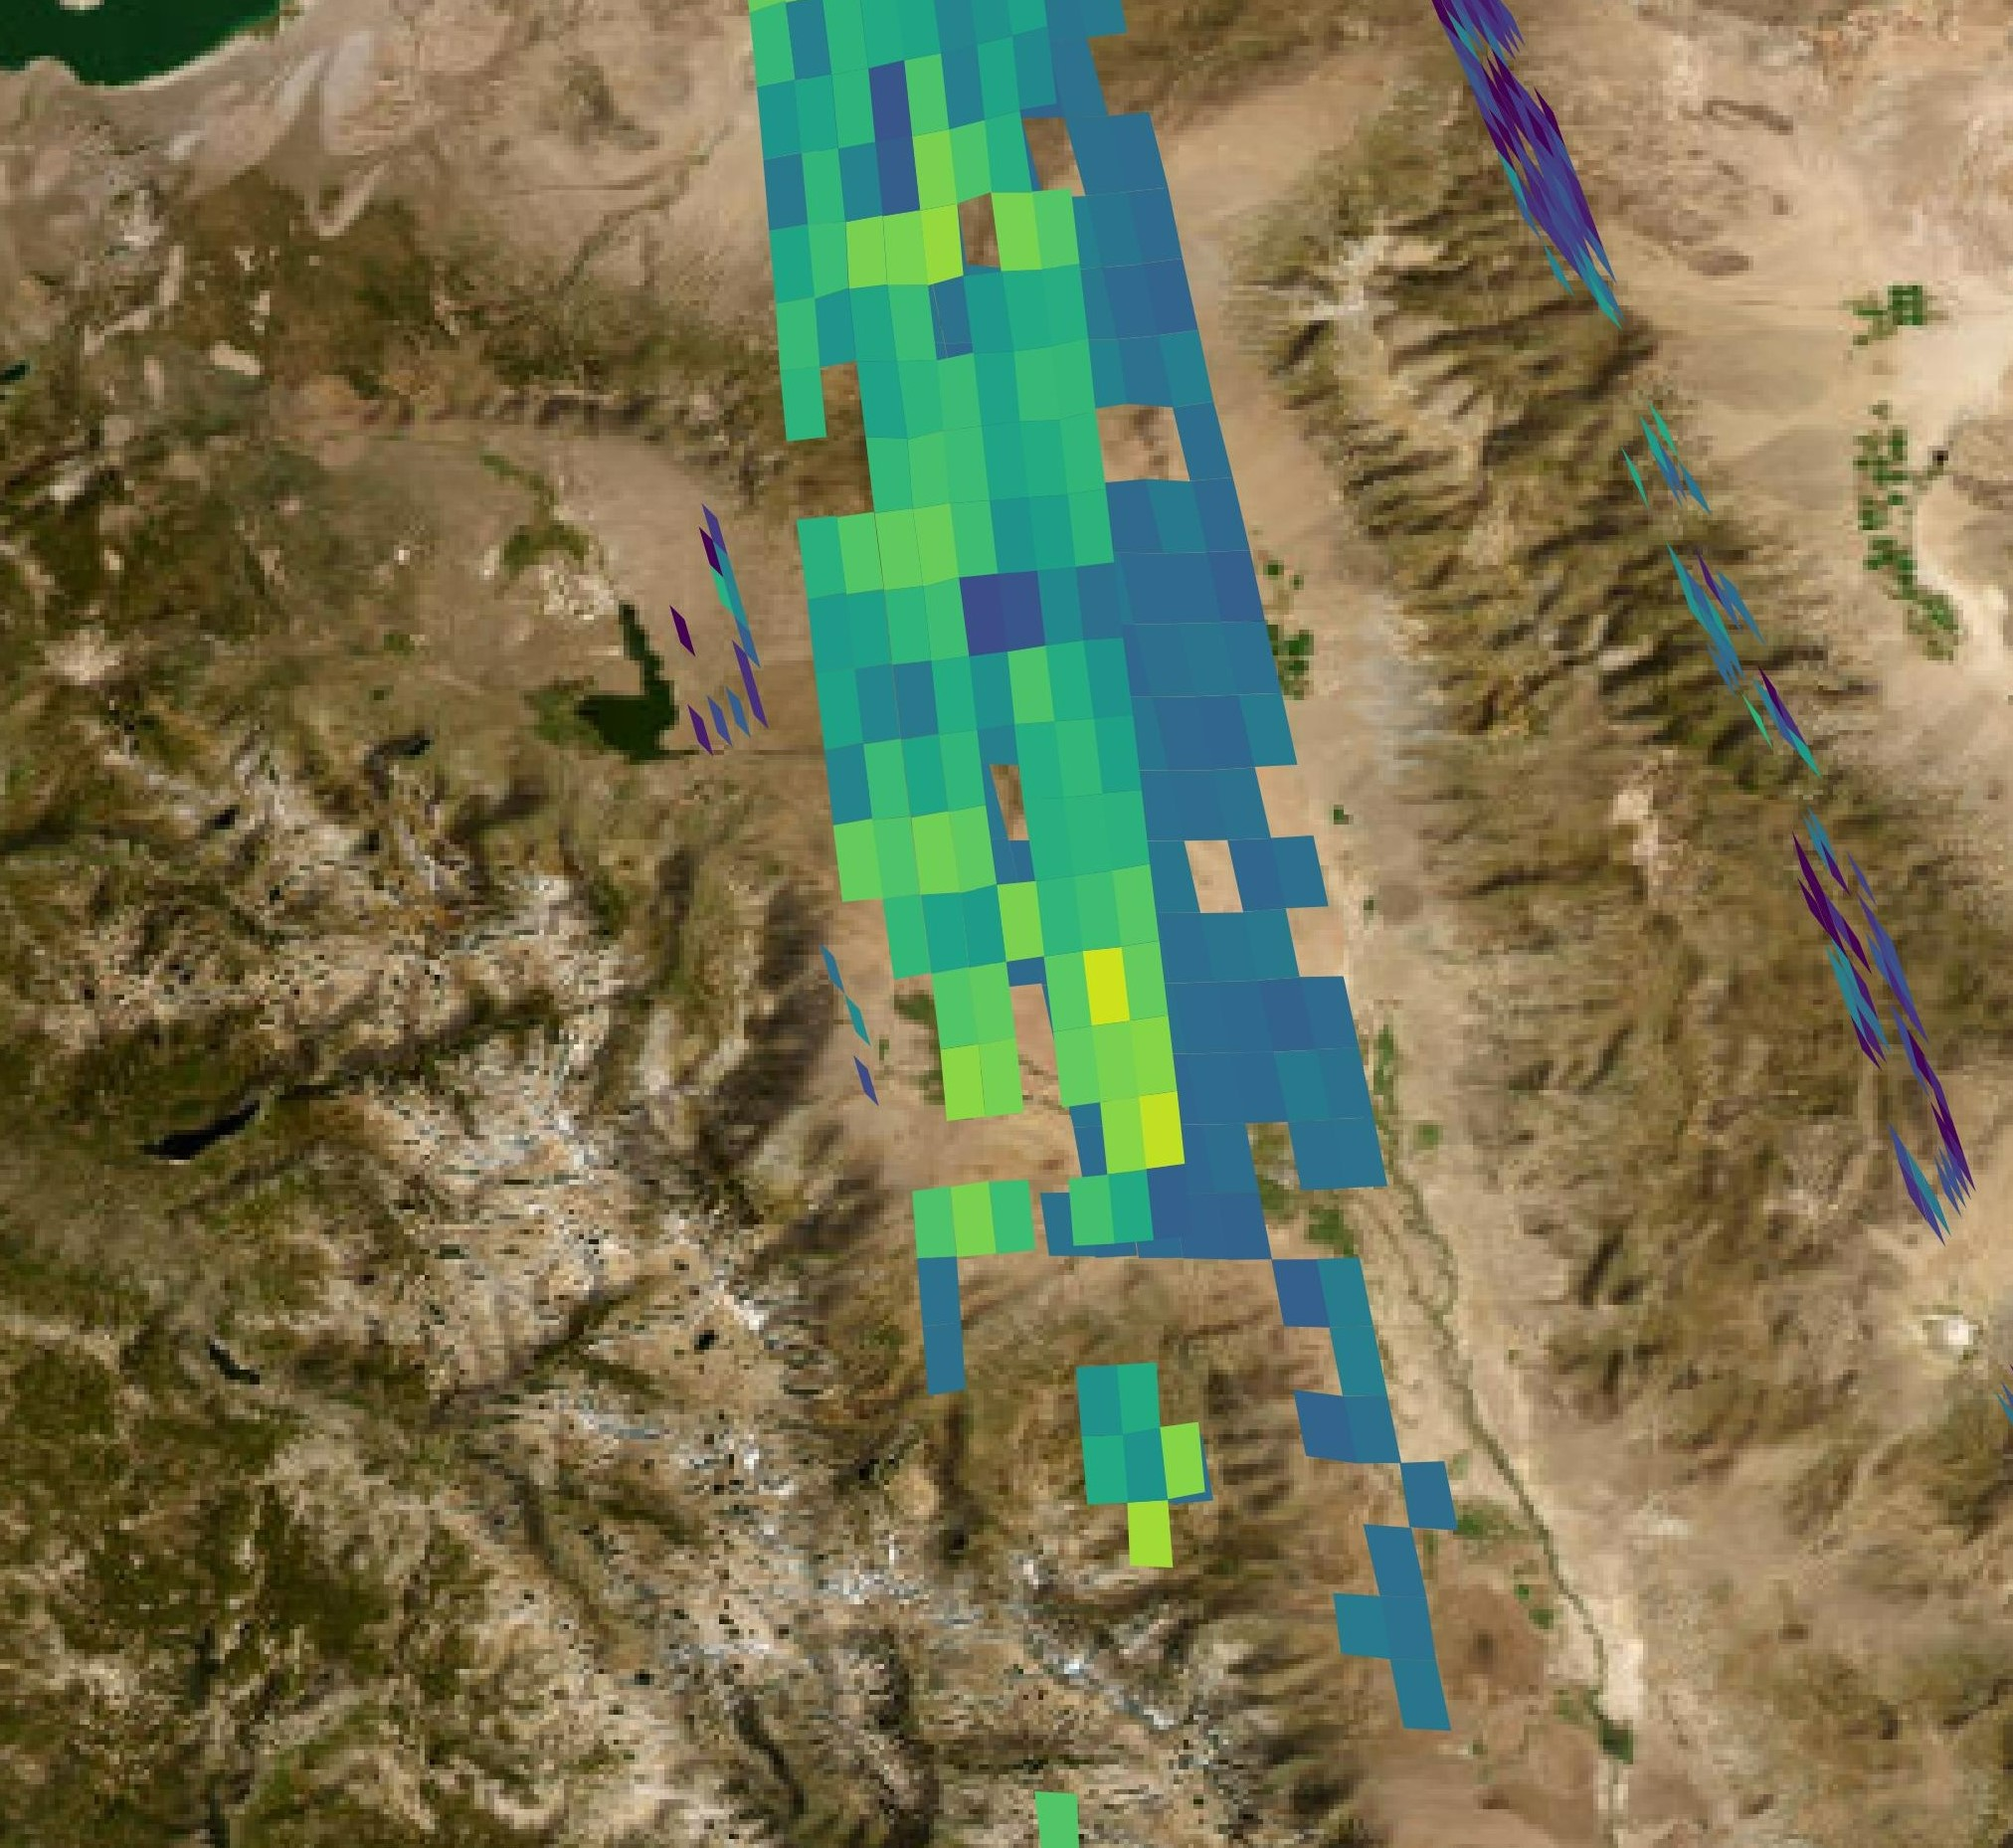

In [9]:
Image(filename="../../screenshots/vertices_plots.jpg", width=350, height= 300)

In [10]:
%%time
xco2_total= xco2_list
patches_total= [mpatches.Polygon(r) for r in unpack_vert]

## perform this action if handling LARGE dataset
## free memory resource
del unpack_vert
gc.collect()

Wall time: 5.01 s


0

In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


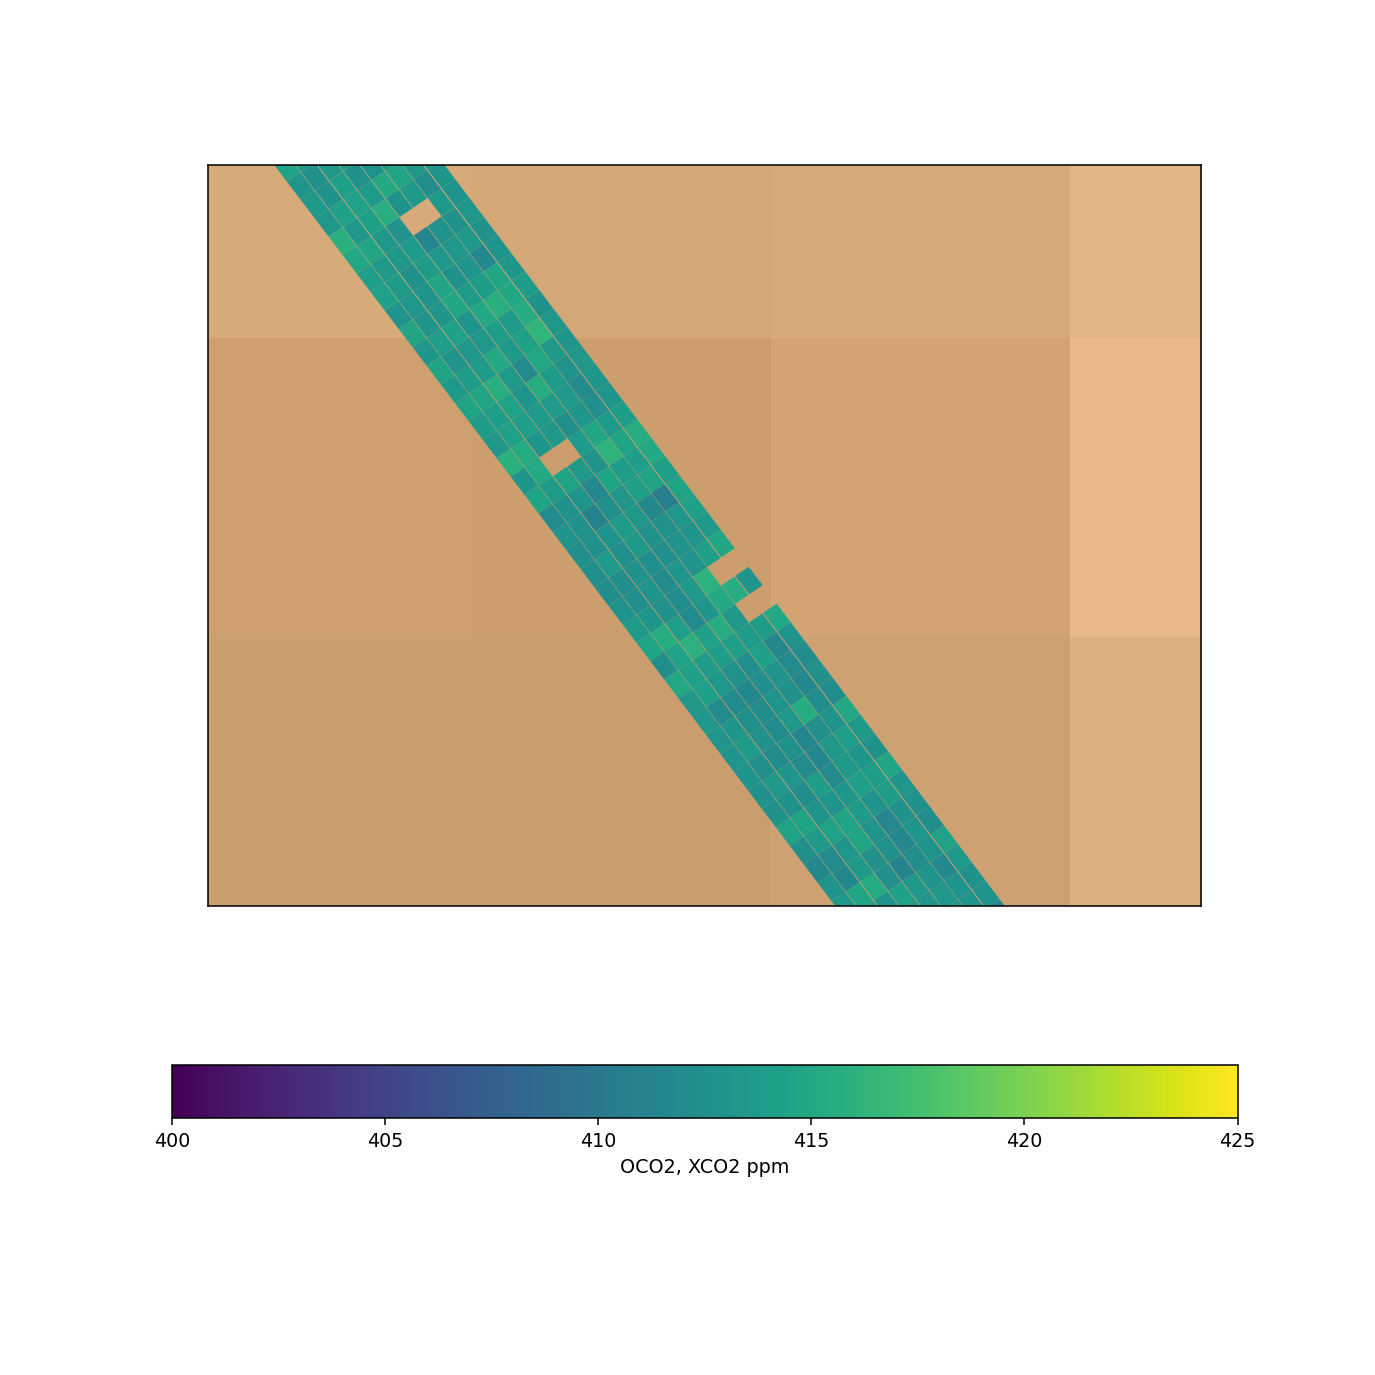

C:\Users\sagarl\AppData\Roaming\Python\Python39\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [12]:
fig= plt.figure(111)
ax= fig.add_subplot(111)

xco2_min_= 400
xco2_max_= 425

## world map
m= Basemap(projection='cyl', 
        resolution='l',
        llcrnrlat= -90, 
        urcrnrlat=90, 
        llcrnrlon= -180, 
        urcrnrlon= 90,
        epsg= 4269)

## CALI map
# m= Basemap(projection= 'cyl',
#         llcrnrlon= -125,
#         urcrnrlon= -114.37,
#         llcrnrlat= 32.27,
#         urcrnrlat= 42.2514,
#         resolution='l', 
#         epsg= 4269
#           )

## ARC gis image
m.arcgisimage(server='http://server.arcgisonline.com/ArcGIS', 
             #service='World_Shaded_Relief', 
             service='World_Imagery',
             xpixels=1000, ypixels=None, dpi= 1000, verbose=False)

cmap= plt.get_cmap('viridis')
colors= cmap(xco2_total)

## normalize
norm= matplotlib.colors.Normalize(vmin= xco2_min_,
                             vmax= xco2_max_)

## patch collection and plt show
p= PatchCollection(patches_total,
               cmap= matplotlib.cm.viridis, 
               #alpha= 0.95, 
              # linewidths= 4
               edgecolor='none',
               norm= norm
              )

# set color range from XCO2
p.set_array(xco2_total)

# set the size of the map
plt.gcf().set_size_inches(10, 10)
ax.add_collection(p)

## colorbar
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=400, vmax=425)

cbar= plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
               orientation='horizontal', label='OCO2, XCO2 ppm')


#    plt.savefig(str(year)+ "_cali_"+str(month)+"_oco2.jpg", dpi= 2500, bbox_inches='tight', pad_inches= 2)
plt.show()

In [13]:

# ## pandas dataframe
# df_oco2= pd.DataFrame(columns=["Longitude_vertices", "Latitude_vertices", "Xco2", "Longitude", "Latitude"])

# df_oco2["Longitude_vertices"]= lon_list_a
# df_oco2["Latitude_vertices"]= lat_list_a
# df_oco2["Xco2"]= xco2_list_a
# df_oco2["Longitude"]= lon_a
# df_oco2["Latitude"]= lat_a
# df_oco2["qual_flag"]= sif_qual_flag


# flat_vert=[]
# for j in range(len(df_oco2)):
#     flat_vert.append( (np.dstack([df_oco2['Longitude_vertices'][j], df_oco2['Latitude_vertices'][j] ]).tolist()))




# ## XCO2 total values
# xco2_total= np.array(df_oco2['Xco2'][:])

# ## FUNCTION to split the brackets
# def split_bracket(d):
#     l = [float(x.strip(' []')) for x in d.split(',')]
#     return l
    
# #####################
# ## transform the column to list of FLOAT types
# #df["Longitude_vertices"]=df["Longitude_vertices"].apply(split_bracket)
# #df["Latitude_vertices"]=df["Latitude_vertices"].apply(split_bracket)
# #

# #########################
# ## D-stack the vertices and put into list
# flat_vert=[]
# for j in range(len(df_oco2)):
#     flat_vert.append(np.dstack([ np.array(df_oco2['Longitude_vertices'][j]), np.array(df_oco2['Latitude_vertices'][j]) ]))


# # flat_verterices SHAPE from MULTI-dimensional shape
# unpack_vert= [element for sublist in flat_vert for element in sublist]
